In [80]:
# https://siboehm.com/articles/19/normalizing-flow-network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

## Normalizing Flows (1D example)

Suppose we want to model the density of a variable $X$ based on some samples $x_i$. What we usually do is assume that $X$ follows a known distribution (e.g Gaussian) and estimate the value of the paremeters that achieve the best fit (maximize the likelihood). The main limitation of this approach is that we need to assume some prior distribution, which not always reflect the complexity of the target distribution

What if we could fit the data to more complex and a priori unknown distributions? This is basically what Normalizing Flows (NF) do. Let's grasp the idea of NFs through a little example.

Suppose we have a variable $X_1$ who follows a Gaussian distribution $p$ with $\mu=0$ and $\sigma=1$

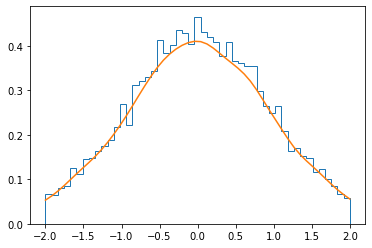

In [2]:
X1 = np.random.normal(loc = 0, scale = 1, size = 10000)
density_X1 = stats.gaussian_kde(X1)

n, x, _ = plt.hist(X1, bins = np.linspace(-2, 2, 50), 
                   histtype = u'step', density = True)
plt.plot(x, density_X1(x))

Let's define the function $f(x)=\frac{1}{3}x$

In [3]:
def f(x):
    return (1/3) * x

If we apply this function to X1 we get a narrower Gaussian $q$ who corresponds with the parameters $\mu=0$ and $\sigma=1/3$

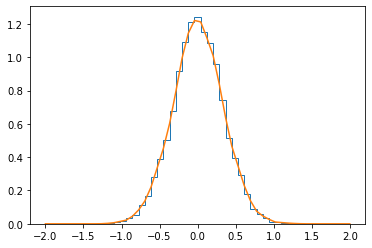

In [4]:
X2 = f(X1)
density_X2 = stats.gaussian_kde(X2)

n, x, _ = plt.hist(X2, bins = np.linspace(-2, 2, 50), 
                   histtype = u'step', density = True)
plt.plot(x, density_X2(x))

We have performed a transformation to the initial distribution ($p$) obtaining a different one ($q$). What if I want to know the density of this new distribution? (assuming we are not able to know that $\mu=0$ and $\sigma=1/3$)

Well, $f$ is invertible so $f^{-1}(x)=3x$

In [5]:
def f_inv(x):
    return 3*x

With this we can recover the value of a sample $x_1$ given $x_2$ $\rightarrow$ $x_1=f^{-1}(x_2)$

In [6]:
x1 = np.random.normal(loc = 0, scale = 1)
print('x1 sample: {0:0.4f}'.format(x1))

x2 = f(x1)
print('x2: {0:0.4f}'.format(x2))

print('recovered x1: {0:0.4f}'.format(f_inv(x2)))

x1 sample: -0.9255
x2: -0.3085
recovered x1: -0.9255


We could think that $q(x_2)=p(f^{-1}(x_2))$

In [8]:
x2_inv_prob = stats.norm(0, 1).pdf(f_inv(x2))
print('p(f_inv(x2)): {0:0.4f}'.format(x2_inv_prob))

x2_true_prob = stats.norm(0, 1/3).pdf(x2)
print('true q(x2): {0:0.4f}'.format(x2_true_prob))

p(f_inv(x2)): 0.2600
true q(x2): 0.7799


What we can see how this is not true. To this to be possible  we also need to take into account the transformation we made on the density through $f$. This can be done by multiplying the previous result with $|\frac{\partial f^{-1}}{\partial y}| = |\frac{\partial f}{\partial x}|^{-1}$

In [9]:
def df_inv(x):
    return 3

In [10]:
print('true q(x2): {0:0.4f}'.format(x2_true_prob))

x2_correct_prob = stats.norm(0, 1).pdf(f_inv(x2)) * np.abs(df_inv(x2))
print('estimated q(x2): {0:0.4f}'.format(x2_correct_prob))

true q(x2): 0.7799
estimated q(x2): 0.7799


Now we can recover the density of $q$ just knowing the density of $x$ and the transformation applied. Of course for this to work we need $f$ to be differentiable and invertible.

What be achieved applying function $f$ is generate a new density function $q$ wich was a transformation of $p$. Given the properties of $f$ we can sample and compute likelihood on $q$ without knowing its analitcal formula.

This idea opens the door to the modelling of complex distributions based on simple ones by a concatenation of differentiable and invertible transformation :)

#### References

[1] Simon Boehm, *The Normalizing Flow Network* (https://siboehm.com/articles/19/normalizing-flow-network)